In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

//anaconda/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
f=open('uspop10.asc','r')

In [4]:
linesdf=[]
for line in f:
    linesdf.append(line.split(" "))
df=pd.DataFrame(linesdf)



In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940
0,ncols,,,,,,,,,6940\n,...,None,None,None,None,None,None,None,None,None,None
1,nrows,,,,,,,,,2984\n,...,None,None,None,None,None,None,None,None,None,None
2,xllcorner,,,,,-124.77500000221\n,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,yllcorner,,,,,24.516666669087\n,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,cellsize,,,,,,0.0083333333333334\n,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,NODATA_value,,-9999\n,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,\n
7,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,\n
8,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,\n
9,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,\n


In [7]:
ncols=int(df[9][0][:-1])
nrows=int(df[9][1][:-1])
xllcorner=float(df[5][2][:-1])
yllcorner=float(df[5][3][:-1])
cellsize=float(df[6][4][:-1])
print(ncols,nrows,xllcorner,yllcorner,cellsize)
xleft=xllcorner
xright=xllcorner+ncols*cellsize
yup=yllcorner+nrows*cellsize
ydown=yllcorner
upper_west_point=(xleft,yup)
lower_east_point=(xright,ydown)
latitude_km=40000/360 #it's an approximation as it varies between 111,6 and 110,8 something like that
#for a given latitude, to compute the longitude we need to have the latitude in degrees, and then one degree of
#longitude will be equal to longitude_km=latitude_km*cos(latitude)

6940 2984 -124.77500000221 24.516666669087 0.0083333333333334


In [8]:
df=df.drop([ncols],axis=1)

In [9]:
for i in range(6):
    df=df.drop(df.index[0])

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,6930,6931,6932,6933,6934,6935,6936,6937,6938,6939
6,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
7,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
8,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
9,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
10,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
11,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
12,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
13,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
14,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
15,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [11]:
dx=abs(xleft-xright)/ncols
dy=abs(yup-ydown)/nrows
print(dy,dx)

0.008333333333333397 0.008333333333333397


In [29]:
indexes_x=[]
for i in np.arange(xleft,xright-dx/2,dx): #-dx/2 in order to make the size of indexes_x match the number of cols
    indexes_x.append(i)
indexes_y=[]
for j in np.arange(yup,ydown,-dy):
    indexes_y.append(j)
len(indexes_x)

6940

In [30]:
df.columns=indexes_x

In [31]:
df.index=indexes_y

In [32]:
df

,-124.775000002,-124.766666669,-124.758333336,-124.750000002,-124.741666669,-124.733333336,-124.725000002,-124.716666669,-124.708333336,-124.700000002,...,-67.0250000022,-67.0166666688,-67.0083333355,-67.0000000022,-66.9916666688,-66.9833333355,-66.9750000022,-66.9666666688,-66.9583333355,-66.9500000022
49.383333,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.375000,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.366667,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.358333,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.350000,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.341667,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.333333,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.325000,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.316667,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
49.308333,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [33]:
-70;-88

-88

In [34]:
25;41

41

In [35]:
(41-25)/dy

1919.9999999999852

In [36]:
18/dx

2159.999999999983

In [37]:
1108*907
(40.269230769232081,
 -78.36793785301893,
 38.858974358975729,
 -76.337570621378745)

(40.26923076923208, -78.36793785301893, 38.85897435897573, -76.33757062137875)

In [38]:
df.columns[5596]

-78.141666668839562

In [39]:
df.columns[5840]

-76.108333335504611

In [40]:
washington_area_long=df.columns[5596:5841]

In [49]:
df.index[1090]

40.300000002421044

In [54]:
df.index[1270]

38.800000002421129

In [55]:
washington_area_lat=df.index[1090:1271]

In [56]:
longwash=df[washington_area_long]

In [57]:
washington=longwash.iloc[1090:1271]

In [58]:
k=0


In [59]:
washington=washington.astype(float)
for i in washington.columns:
    for j in washington[i]:
        k+=j
print(k)

-6661534.61264


In [60]:
df.convert_objects(convert_numeric=True)
k=0
mean=0
for i in df.columns:
    for j in df[i]:
        k=max(k,float(j))
        mean+=float(j)
print(k)
print(mean/(len(df.columns)*len(df.index)))

42024.16
-4297.815207613178


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df1 = df[df.columns].astype(float)
df1log=np.log10(df1)
df2=washington[washington.columns].astype(float)
df2log=np.log10(df2)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10


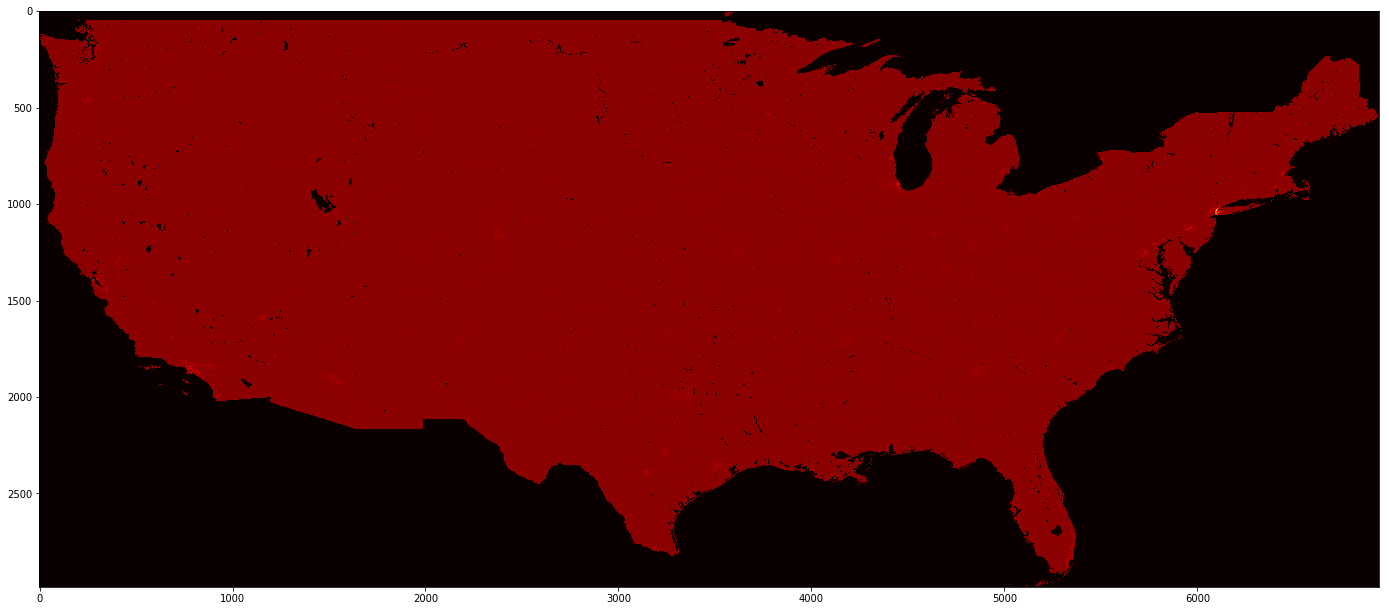

In [67]:
fig = plt.figure(figsize = (24, 12))
ax = plt.subplot()

ax.imshow(df1, cmap='hot', interpolation='nearest')


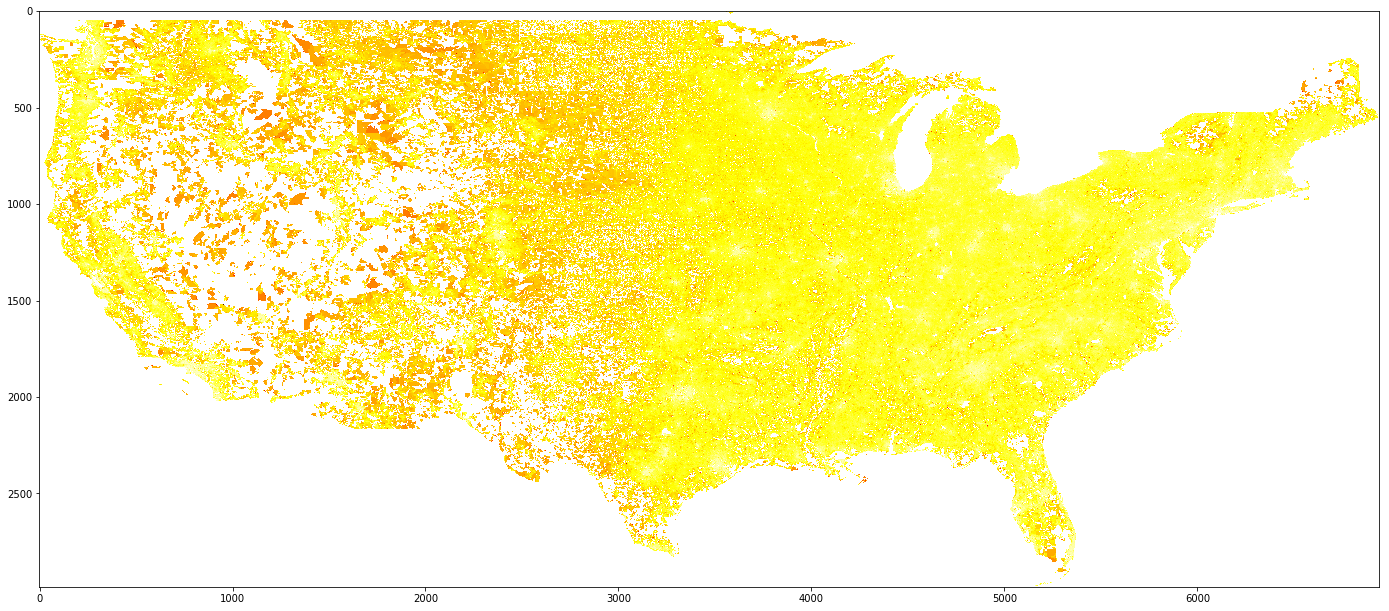

In [71]:
fig = plt.figure(figsize = (24, 12))
ax = plt.subplot()

ax.imshow(df1log, cmap='hot', interpolation='nearest')

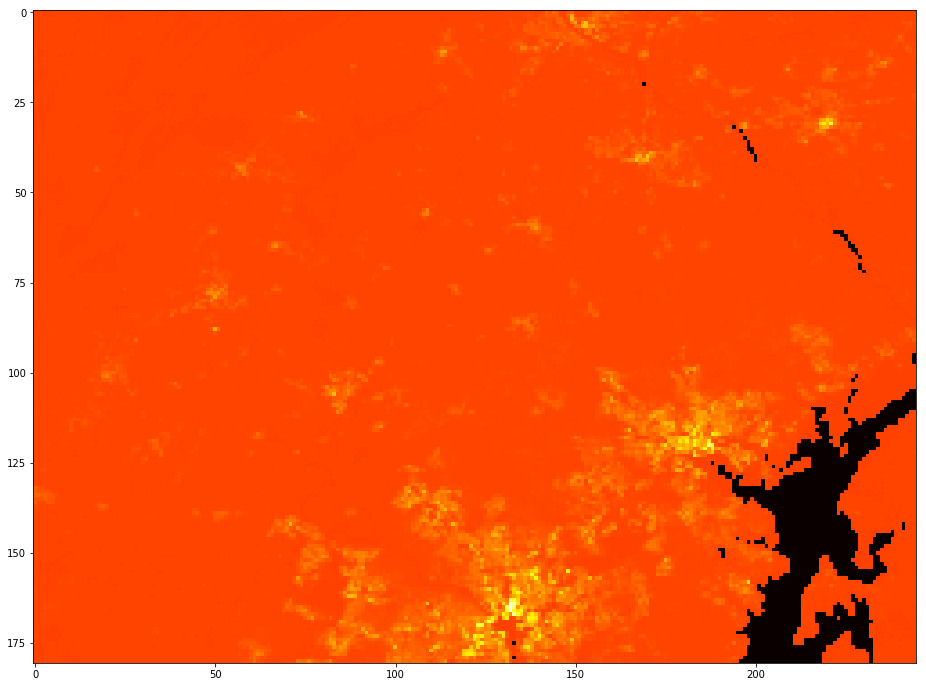

In [72]:
fig = plt.figure(figsize = (24, 12))
ax = plt.subplot()

ax.imshow(df2, cmap='hot', interpolation='nearest')

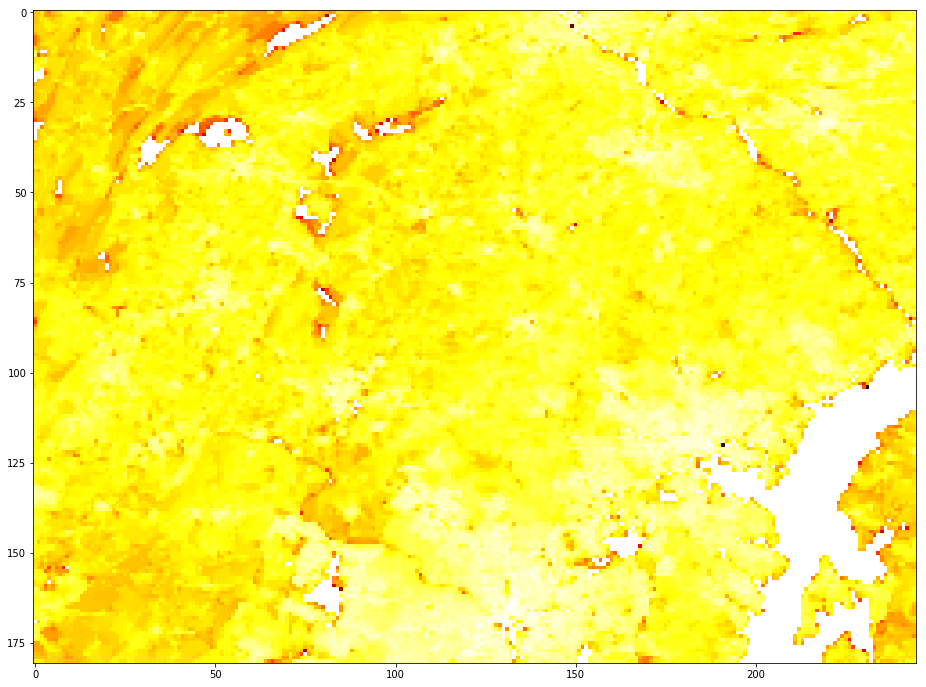

In [73]:
fig = plt.figure(figsize = (24, 12))
ax = plt.subplot()

ax.imshow(df2log, cmap='hot', interpolation='nearest')